In [1]:
import scanpy as sc
import numpy as np
import scanpy as sc
import scIB
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = 8,8

## Dense matrix conversion into rpy2
https://github.com/theislab/anndata2ri/issues/24

In [18]:
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR) # Ignore R warning messages
import rpy2.robjects as ro
import anndata2ri

anndata2ri.activate()

In [25]:
matrix = np.matrix([[1,2,3,2,4,6,3], [2,3,52,14,3.2, 12.4,1]])
matrix

matrix([[ 1. ,  2. ,  3. ,  2. ,  4. ,  6. ,  3. ],
        [ 2. ,  3. , 52. , 14. ,  3.2, 12.4,  1. ]])

In [26]:
# import matrix to rpy2
ro.globalenv["matrix"] = matrix
ro.r("matrix")

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [27]:
matrix = np.squeeze(np.asarray(matrix))

In [28]:
ro.globalenv["matrix"] = matrix
ro.r("matrix")

array([[ 1. ,  2. ,  3. ,  2. ,  4. ,  6. ,  3. ],
       [ 2. ,  3. , 52. , 14. ,  3.2, 12.4,  1. ]])

In [29]:
anndata2ri.deactivate()

## Highly Variable Genes computation not working
not working for dense matrix

In [7]:
adata_file = "/storage/groups/ml01/workspace/group.daniela/MCA_norm/Marrow.h5ad"
adata_file = "/storage/groups/ml01/workspace/group.daniela/tm/facs/norm/Limb_Muscle_raw.h5ad"

In [8]:
adata = sc.read(adata_file)

In [16]:
if not sparse.issparse(adata.X):
    adata.X = sparse.csr_matrix(adata.X)

In [17]:
adata.X

<5037x23433 sparse matrix of type '<class 'numpy.float32'>'
	with 15944388 stored elements in Compressed Sparse Row format>

In [20]:
scIB.preprocessing.normalize(adata)

In [19]:
sum(adata.obs["cell_type"] == "nan")

0

In [13]:
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=4000)

/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:137: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_mad_bin[df['mean_bin'].values].values


**Solved:** probably forgot to filter out genes

## HVG not reproducible when using `batch_key`

In [9]:
sc.pp.filter_genes(adata, min_cells=1)

In [10]:
bk_hvg = scIB.preprocessing.hvg_batch(adata, batch_key='tissue', n_top_genes=4000)
nk_hvg = scIB.preprocessing.hvg_batch(adata, batch_key=None, n_top_genes=4000)

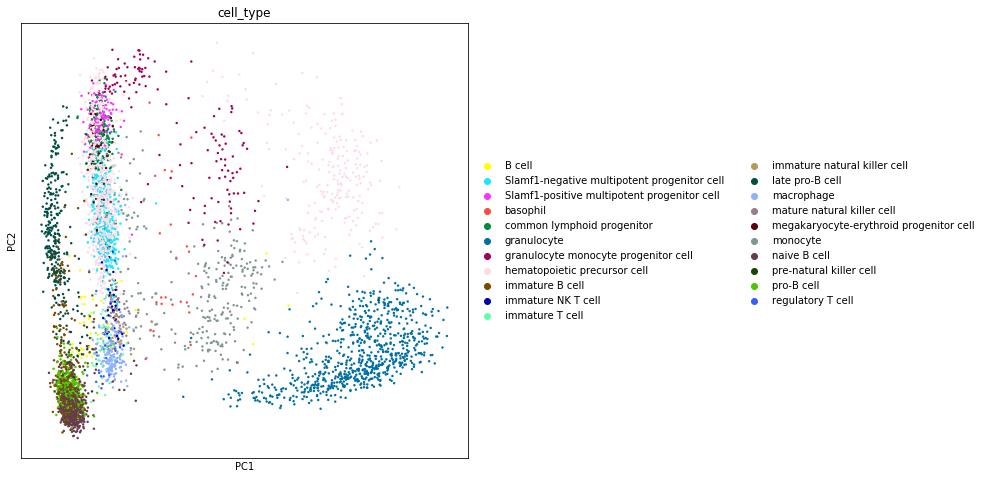

In [11]:
adata.var['highly_variable'] = [g in bk_hvg for g in adata.var.index]
sc.pp.pca(adata, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.pl.pca(adata, color='cell_type', palette=sc.pl.palettes.godsnot_64)

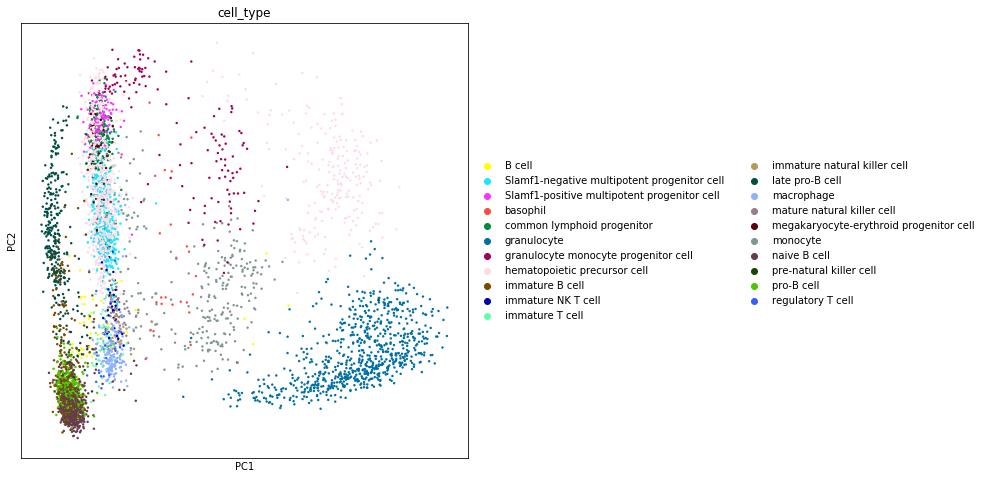

In [12]:
adata.var['highly_variable'] = [g in nk_hvg for g in adata.var.index]
sc.pp.pca(adata, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.pl.pca(adata, color='cell_type', palette=sc.pl.palettes.godsnot_64)

In [13]:
scIB.preprocessing.reduce_data(adata, hvg=False, batch=None, pca=True, umap=False)

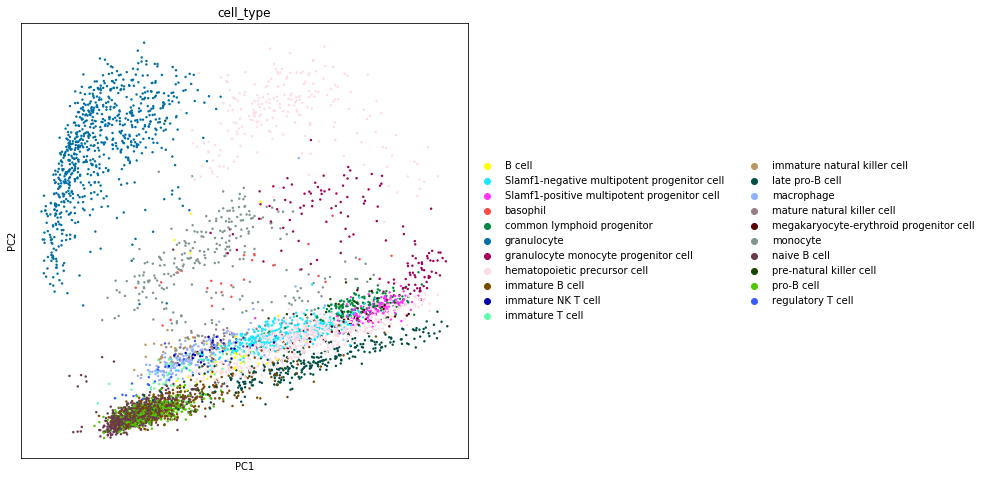

In [14]:
sc.pl.pca(adata, color='cell_type', palette=sc.pl.palettes.godsnot_64)

In [15]:
scIB.preprocessing.reduce_data(adata, hvg='tissue', batch=None, pca=True, umap=False)


Number of highly variable genes: 100


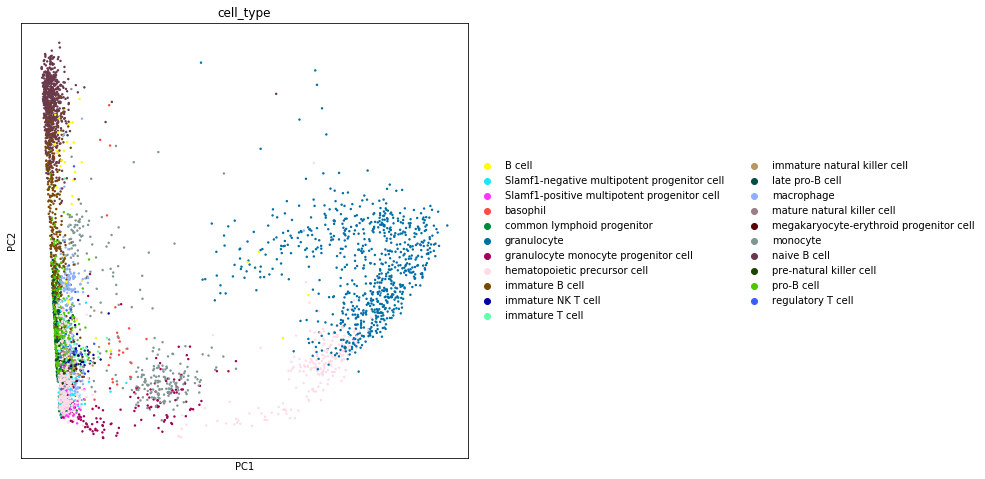

In [16]:
sc.pl.pca(adata, color='cell_type', palette=sc.pl.palettes.godsnot_64)

**Solved**: was using a bad default number of HVG -> large differences in visualisation

## Import to R: dcmatrix indices not sorted

In [3]:
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR) # Ignore R warning messages
import rpy2.robjects as ro
import anndata2ri

anndata2ri.activate()

In [6]:
adata_file = "/storage/groups/ml01/workspace/group.daniela/atlases_brain.h5ad"
adata = sc.read(adata_file)

In [9]:
ro.globalenv["adata"] = adata

RRuntimeError: Error in validObject(.Object) : 
  invalid class “dgCMatrix” object: row indices are not sorted within columns
Calls: <Anonymous> ... initialize -> callNextMethod -> .nextMethod -> validObject
